## Obtenção dos dados

In [12]:
# Criando o dataset

# A
a =[0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 0, 0]
# C
c =[0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]

# Saída
y =[[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]


## Visualização dos dados

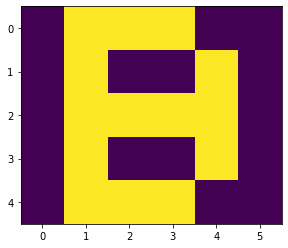

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Plotando A.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()


## Preparação dos dados

In [14]:
# Convertendo para array do numpy

"""
Convertendo as entradas em apenas um vetor do numpy para alimentar diretamente
a rede neural.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
								np.array(c).reshape(1, 30),]
								

y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Implementado a Rede Neural

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Criação da MLP
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2,b1,b2):
	# hidden layer
	z1 = x.dot(w1) + b1# entrada vindo da layer 1
	a1 = sigmoid(z1)# saida da layer 2
	
	# Output layer
	z2 = a1.dot(w2) + b2# entrada vindo da camada anterior
	a2 = sigmoid(z2)# saida da ultima camada
	return(a2)

# Inicializa os pesos randomicamente (entre 0 e 1)
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# Calculo do main square error (MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Backpropagation of error
def back_prop(x, y, w1, w2, b1, b2, alpha):
	# hidden layer
	z1 = x.dot(w1)# entrada vindo da layer 1
	a1 = sigmoid(z1+b1)# saida da layer 2
	
	# Output layer
	z2 = a1.dot(w2)# entrada vindo da camada anterior
	a2 = sigmoid(z2+b2)# saida da ultima camada
	
	# Erro na camada de saida
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradiente dos pesos
	w1_adj = x.transpose().dot(d1)
	db1 = d1[-1][-1] 
	w2_adj = a1.transpose().dot(d2)
	db2 = d2[-1][-1] 
	
	# Atualiza os pesos e bias
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	b1 = b1-(alpha*db1)
	b2 = b2-(alpha*db2)
	
	return(w1, w2, b1, b2)

def train(x, Y, w1, w2, b1, b2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2, b1, b2)
			l.append((loss(out, Y[i])))
			w1, w2, b1, b2 = back_prop(x[i], y[i], w1, w2, b1, b2, alpha)
		print("Iteração:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2, b1, b2)

def predict(x, w1, w2, b1, b2):
	Out = f_forward(x, w1, w2, b1, b2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Imagem da letra A.")
	elif(k == 1):
		print("Imagem da letra B.")
	else:
		print("Imagem da letra C.")
	#mostra o resultado
	plt.imshow(x.reshape(5, 6))
	plt.show()




## Execução da MLP

In [16]:
# Gera os pesos sinapticos da rede
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
b1 = np.random.randn()
b2 = np.random.randn()

print(w1)
print(f'Tamanho da matriz de pesos w1: {len(w1)} x {len(w1[0])}')
print('\n\n', w2)
print(f'Tamanho da matriz de pesos w2: {len(w2)} x {len(w2[0])}\n')
print('b1 : ', b1)
print('b2 : ', b2)

[[ 1.19045229e+00  5.98621413e-01  1.42521115e+00  1.34625938e+00
   7.57265136e-01]
 [ 2.89365017e+00 -7.62571986e-01  6.02047163e-01  3.59247975e-01
   5.20757394e-01]
 [-5.52353763e-01 -1.43706391e+00 -1.98323223e+00 -1.21741857e+00
  -7.15424097e-01]
 [ 8.28819837e-01 -9.41312618e-01  5.38475239e-01 -1.39409246e+00
   2.72018848e-02]
 [-5.49361142e-01  6.92068544e-01 -9.32133402e-01 -1.51729460e+00
   3.28919024e-01]
 [-1.38621873e+00  1.43226004e+00  7.54523610e-01  5.75278692e-01
   9.55598241e-01]
 [-8.82865026e-01 -9.30576758e-01  2.05548412e+00  7.07661220e-01
  -5.98373217e-01]
 [ 2.20875098e-01 -3.75905804e-01 -9.36223574e-02  5.75889838e-03
   2.39204762e-02]
 [-1.73847196e+00 -8.94046397e-01  9.58942761e-01  7.10600331e-01
   3.54248820e-02]
 [ 3.77779227e-01  2.24651502e-02  2.36266804e+00  7.34434788e-01
  -5.56913483e-01]
 [-6.39795026e-01  1.22929600e+00  2.29765174e+00 -4.15549142e-01
   2.29209103e+00]
 [-1.36568827e-01 -2.84718317e-01 -1.39115153e-01 -1.83176179e-01

In [17]:
"""Os argumentos da função de treino é a matriz X,
resultados corretos y, pesos w1, w2, taxa de aprendizado = 0.1,
numero de iteralções ou épocas. Essa função vai retornar várias listas
uma com a acuracia do treino, outra com o MSE e os pesos da rede
após o treino"""

acc, losss, w1, w2, b1, b2 = train(x, y, w1, w2, b1, b2, 0.2, 100)


Iteração: 1 ======== acc: 75.14996850572612
Iteração: 2 ======== acc: 77.88321848614011
Iteração: 3 ======== acc: 80.3019687624033
Iteração: 4 ======== acc: 81.85697612452604
Iteração: 5 ======== acc: 82.81937115838454
Iteração: 6 ======== acc: 83.53983777949686
Iteração: 7 ======== acc: 84.16117360623244
Iteração: 8 ======== acc: 84.73761220354731
Iteração: 9 ======== acc: 85.28859749216944
Iteração: 10 ======== acc: 85.81811536874032
Iteração: 11 ======== acc: 86.32401427742346
Iteração: 12 ======== acc: 86.80319234034879
Iteração: 13 ======== acc: 87.25406738995014
Iteração: 14 ======== acc: 87.67728082271667
Iteração: 15 ======== acc: 88.07552475416408
Iteração: 16 ======== acc: 88.4530671905128
Iteração: 17 ======== acc: 88.81523003085469
Iteração: 18 ======== acc: 89.1679012572462
Iteração: 19 ======== acc: 89.51709020935206
Iteração: 20 ======== acc: 89.86849879432405
Iteração: 21 ======== acc: 90.22706875787293
Iteração: 22 ======== acc: 90.59648710288994
Iteração: 23 ======== 

## Resultados

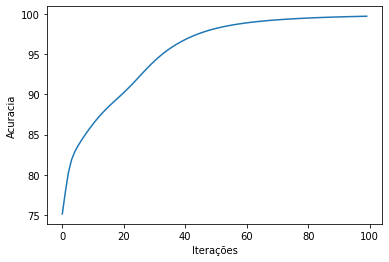

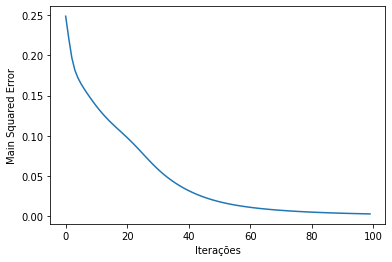

In [18]:
import matplotlib.pyplot as plt1

# ploting accuraccy
plt1.plot(acc)
plt1.ylabel('Acuracia')
plt1.xlabel("Iterações")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Main Squared Error')
plt1.xlabel("Iterações")
plt1.show()


In [19]:
# Pesos após o treino
print('W1 : \n',w1, "\n W2 :\n", w2)
print('b1 : ', b1)
print('b2 : ', b2)


W1 : 
 [[ 1.19045229e+00  5.98621413e-01  1.42521115e+00  1.34625938e+00
   7.57265136e-01]
 [ 2.54172310e+00 -1.07816560e+00  5.20876089e-01  4.29215697e-01
   9.80789188e-01]
 [-9.16399395e-01 -1.46585149e+00 -2.11473689e+00 -1.21294306e+00
  -3.63209260e-01]
 [ 4.64774206e-01 -9.70100199e-01  4.06970578e-01 -1.38961694e+00
   3.79416723e-01]
 [-1.46507714e+00  3.74216413e-01 -1.20960428e+00 -1.14563191e+00
   6.39368861e-01]
 [-1.38621873e+00  1.43226004e+00  7.54523610e-01  5.75278692e-01
   9.55598241e-01]
 [-8.82865026e-01 -9.30576758e-01  2.05548412e+00  7.07661220e-01
  -5.98373217e-01]
 [-1.43170534e-01 -4.04693385e-01 -2.25127018e-01  1.02344119e-02
   3.76135314e-01]
 [-1.73847196e+00 -8.94046397e-01  9.58942761e-01  7.10600331e-01
   3.54248820e-02]
 [ 3.77779227e-01  2.24651502e-02  2.36266804e+00  7.34434788e-01
  -5.56913483e-01]
 [-8.81246581e-02  1.51836055e+00  2.44361796e+00 -7.82736314e-01
   2.33385603e+00]
 [-1.36568827e-01 -2.84718317e-01 -1.39115153e-01 -1.83176

###Predição

Imagem da letra B.


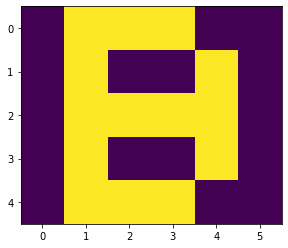

In [20]:
"""
A funçaõ de predição tem os seguintes argumentos:
1) matriz correspondente a imagem
2) w1 pesos apos o treino
3) w2 pesos apos o treino
4) Bias b1 e b2
"""
predict(x[1], w1, w2, b1, b2)
